In [107]:
import pandas as pd 
#import pandas_datareader as pdr  
import yfinance as yf
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
import seaborn as sb 
import math
sb.set()


In [108]:
ticker = "^SPX"
return_type = 'Price_Difference'

In [109]:
raw_data = yf.download(ticker, start="1950-01-03" , end="2012-11-15")
#data = data.pct_change()[1:].filter([return_type]) # calculated daily return
raw_data['Price_Difference'] = raw_data['Close'] - raw_data['Open'] # calculated daily return
data = raw_data[['Price_Difference']]
# We will use the column for Adjusted Close as the column to base our calculations upon
print(data.tail())

[*********************100%%**********************]  1 of 1 completed

            Price_Difference
Date                        
2012-11-08         17.020020
2012-11-09          2.299927
2012-11-12          0.170044
2012-11-13          5.500000
2012-11-14         19.150024


In [110]:
data_length = len(data)
print(data_length)

15820


In [111]:
# Choose ranges to be analyzed. Use power of two. The first range should be the entire length of the data entry, the second range should be two halves, the third range should be four quarters, etc. Stop at 1/32 of the data entry.


series_to_analyze = [] # this is a list, that stores lists of Dataframes
series_to_analyze.append([data])
# e.g. the half arrays are stored [[div2_arrays], [div4_arrays], ... ]
for i in range(1, 6):
    #print("Range", i)
    #print(data_length//2**i)
    current_series = []
    for j in range(0, data_length, data_length//2**i):
        current_series.append(data.iloc[j:j+data_length//2**i])
    series_to_analyze.append(current_series)
    
    

#print(type(series_to_analyze[0][0]))
#print(type(series_to_analyze[0]))
print(series_to_analyze)

[[            Price_Difference
Date                        
1950-01-03          0.000000
1950-01-04          0.000000
1950-01-05          0.000000
1950-01-06          0.000000
1950-01-09          0.000000
...                      ...
2012-11-08         17.020020
2012-11-09          2.299927
2012-11-12          0.170044
2012-11-13          5.500000
2012-11-14         19.150024

[15820 rows x 1 columns]], [            Price_Difference
Date                        
1950-01-03          0.000000
1950-01-04          0.000000
1950-01-05          0.000000
1950-01-06          0.000000
1950-01-09          0.000000
...                      ...
1981-07-02        128.639999
1981-07-06        127.370003
1981-07-07        128.240005
1981-07-08        128.320007
1981-07-09        129.300003

[7910 rows x 1 columns],             Price_Difference
Date                        
1981-07-10        129.369995
1981-07-13        129.639999
1981-07-14        129.649994
1981-07-15        130.229996
1981-07-16     

In [112]:
# Rescale range calculations

calculated_r = []
x_axis = [] # log of size
y_axis = [] # log of rescaled range, averaged


for sub_list in series_to_analyze:
  #print("Num of sub arrays: " , len(sub_list))
  cum_r = 0.0
  size = 0
  tmp = []
  i = 0
  for df in sub_list:
    df= df[1:]
    print(df)
    size = len(df) # number of data points, size of data
    
    #print("size: ", size)
    if i == 0:
      x_axis.append(math.log10(size)) # append the log size
    mean_df = df.mean() # the mean of the data
    std_df = df.std()[return_type] # the standard deviation of the data
    result_df = df - mean_df # new dataframe that stores elemental deviations
    r_t = float(result_df.max() - result_df.min()) # range of deviations
    # print("std :", std_df['Adj Close'])
    rescaled_range = r_t / std_df
    #print("re range: " , rescaled_range)
    cum_r += rescaled_range # this accumulates the rescaled range for an average
    #print("Rescaled range ", rescaled_range)
    if np.isnan(rescaled_range) == False: # get rid of NaN values
      tmp.append(rescaled_range)
    i+=1
  #print("cum", cum_r)
  calculated_r.append(tmp)

print("x axis",x_axis)
print(calculated_r)

# find the rescaled range average of each sublist
for l in calculated_r:
  #print(l)
  avg = sum(l) / len(l) # find the average for each subarray
  y_axis.append(math.log10(avg)) #append log of rescaled range
  
print("y axis: ", y_axis)


            Price_Difference
Date                        
1950-01-04          0.000000
1950-01-05          0.000000
1950-01-06          0.000000
1950-01-09          0.000000
1950-01-10          0.000000
...                      ...
2012-11-08         17.020020
2012-11-09          2.299927
2012-11-12          0.170044
2012-11-13          5.500000
2012-11-14         19.150024

[15819 rows x 1 columns]
            Price_Difference
Date                        
1950-01-04          0.000000
1950-01-05          0.000000
1950-01-06          0.000000
1950-01-09          0.000000
1950-01-10          0.000000
...                      ...
1981-07-02        128.639999
1981-07-06        127.370003
1981-07-07        128.240005
1981-07-08        128.320007
1981-07-09        129.300003

[7909 rows x 1 columns]
            Price_Difference
Date                        
1981-07-13        129.639999
1981-07-14        129.649994
1981-07-15        130.229996
1981-07-16        130.339996
1981-07-17        130

/var/folders/09/w_7j7p_s12x2zkww_1919xq40000gn/T/ipykernel_64517/2996541427.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_t = float(result_df.max() - result_df.min()) # range of deviations
/var/folders/09/w_7j7p_s12x2zkww_1919xq40000gn/T/ipykernel_64517/2996541427.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_t = float(result_df.max() - result_df.min()) # range of deviations
/var/folders/09/w_7j7p_s12x2zkww_1919xq40000gn/T/ipykernel_64517/2996541427.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_t = float(result_df.max() - result_df.min()) # range of deviations
/var/folders/09/w_7j7p_s12x2zkww_1919xq40000gn/T/ipykernel_64517/2996541427.py:25: FutureWarning: Calling flo

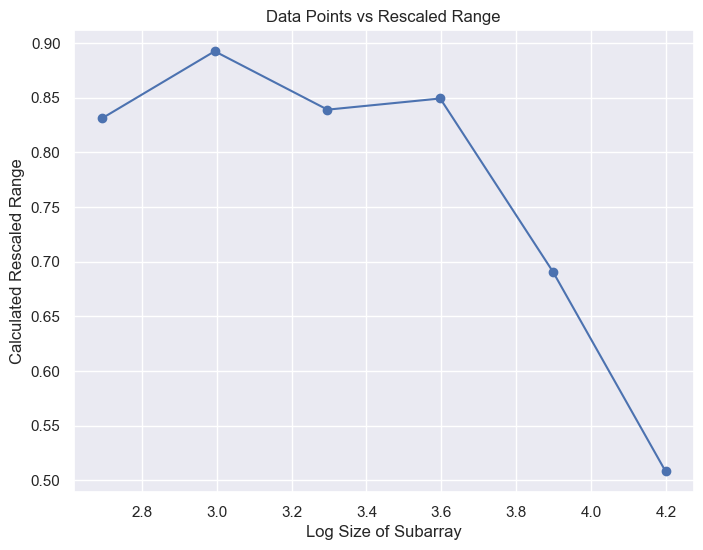

In [113]:
# Plot the line graph with dots for each data point
plt.plot(x_axis, y_axis, marker='o', linestyle='-')


# Add labels and title
plt.xlabel('Log Size of Subarray')
plt.ylabel('Calculated Rescaled Range')
plt.title('Data Points vs Rescaled Range')

# Show the plot
plt.show()

In [114]:
# Calculate H, which is the slope of the graph above

m, c = np.polyfit(x_axis, y_axis, 1)
print("Hearst coefficient is: ")
print(m)

Hearst coefficient is: 
-0.20925263120523346
